#### In this project, I am building a Handwritten Digit Recognition System using TensorFlow and the MNIST dataset. The project will include:
- Deep Neural Network (DNN) with multiple hidden layers.
- ReLU Activation Function for non-linearity.
- Softmax Activation for multi-class classification.
- Adam Optimizer for faster convergence.
- Model evaluation using accuracy, confusion matrix, and predictions.
- Visualization of predictions on real handwritten digits.

#### Using the MNIST dataset, which contains:
- 60,000 training images and 10,000 test images.
- Images are grayscale, 28x28 pixels.
- Each image represents a digit from 0-9.

In [4]:
# Import Required Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#### Load and Preprocess the Dataset
- Load MNIST Dataset
- Normalize the pixel values between 0 and 1.
- One-Hot Encode the labels.
- Split the data into training and testing sets.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


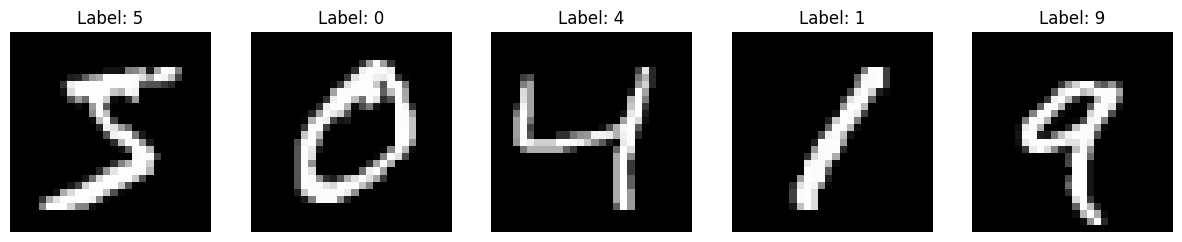

In [7]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data for TensorFlow (28x28 => 784)
X_train_flattened = X_train.reshape(-1, 28 * 28)
X_test_flattened = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)

# Display sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

#### Creating the Neural Network Model
Creating a Sequential Model with the following architecture:

- <b>Input Layer</b>: 784 neurons (28x28 image flattened).
- <b>Hidden Layers:</b>
     - 256 neurons → ReLU activation.
     - 128 neurons → ReLU activation.
     - 64 neurons → ReLU activation.

<b>Output Layer:</b>
- 10 neurons → Softmax activation (for multi-class classification).

#### Activation Functions:

<b>ReLU:</b> Adds non-linearity, preventing the vanishing gradient problem.

<b>Softmax:</b> Outputs probabilities for multi-class classification.

#### Optimizer:

<b>Adam:</b> Adaptive optimization algorithm for faster convergence.

In [27]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model
Training the model with:
- Epochs: 10
- Batch Size: 64
- Validation Split: 20% of training data for validation.

In [30]:
# Train the model
history = model.fit(
    X_train_flattened, y_train_encoded,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8562 - loss: 0.4874 - val_accuracy: 0.9550 - val_loss: 0.1488
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1085 - val_accuracy: 0.9647 - val_loss: 0.1201
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0699 - val_accuracy: 0.9674 - val_loss: 0.1049
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9835 - loss: 0.0523 - val_accuracy: 0.9738 - val_loss: 0.0916
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0365 - val_accuracy: 0.9778 - val_loss: 0.0852
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9747 - val_loss: 0.0900
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0264 - val_accuracy: 0.9697 - val_loss: 0.1153
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.

### Evaluate the Model
Evaluating the model on the test set and display the accuracy.

In [33]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9762 - loss: 0.1002
Test Accuracy: 97.91%


### Plot Training and Validation Accuracy
Visualizing the model's performance over epochs.

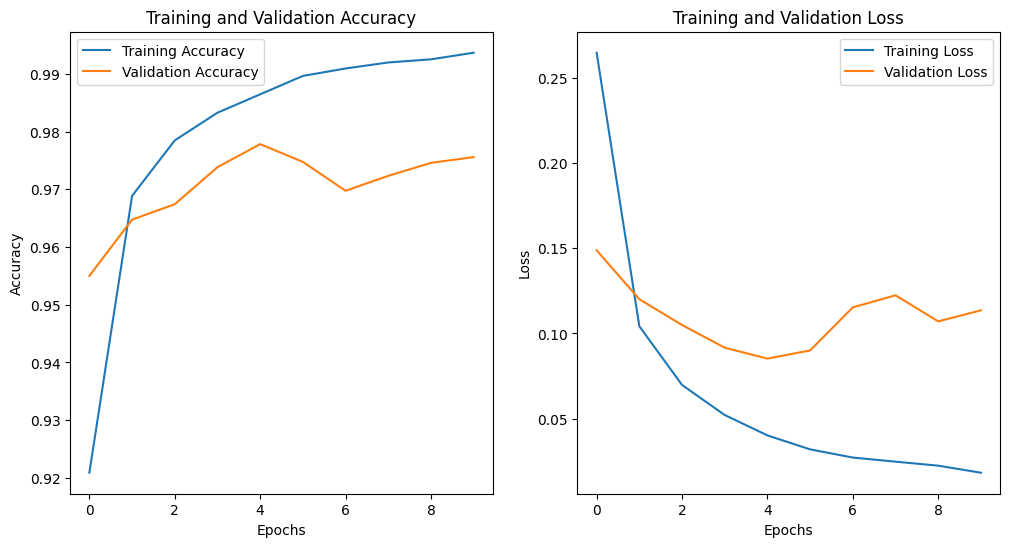

In [36]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Make Predictions and Evaluate
- Making Predictions on the test set.
- Visualize sample predictions.
- Display a Confusion Matrix and Classification Report.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step

Confusion Matrix:
[[ 972    0    0    1    1    1    1    1    3    0]
 [   0 1113    4    1    0    1    5    7    4    0]
 [   4    0 1013    2    2    0    2    6    3    0]
 [   0    0    4  994    0    2    0    4    6    0]
 [   1    1    0    0  965    1    4    2    1    7]
 [   6    0    0   12    2  858    6    1    3    4]
 [   3    2    0    0    3    4  946    0    0    0]
 [   3    0    8    1    0    0    0 1010    2    4]
 [   0    0    2    4    2    6    1    5  952    2]
 [   2    4    1    6   14    2    0   10    2  968]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
    

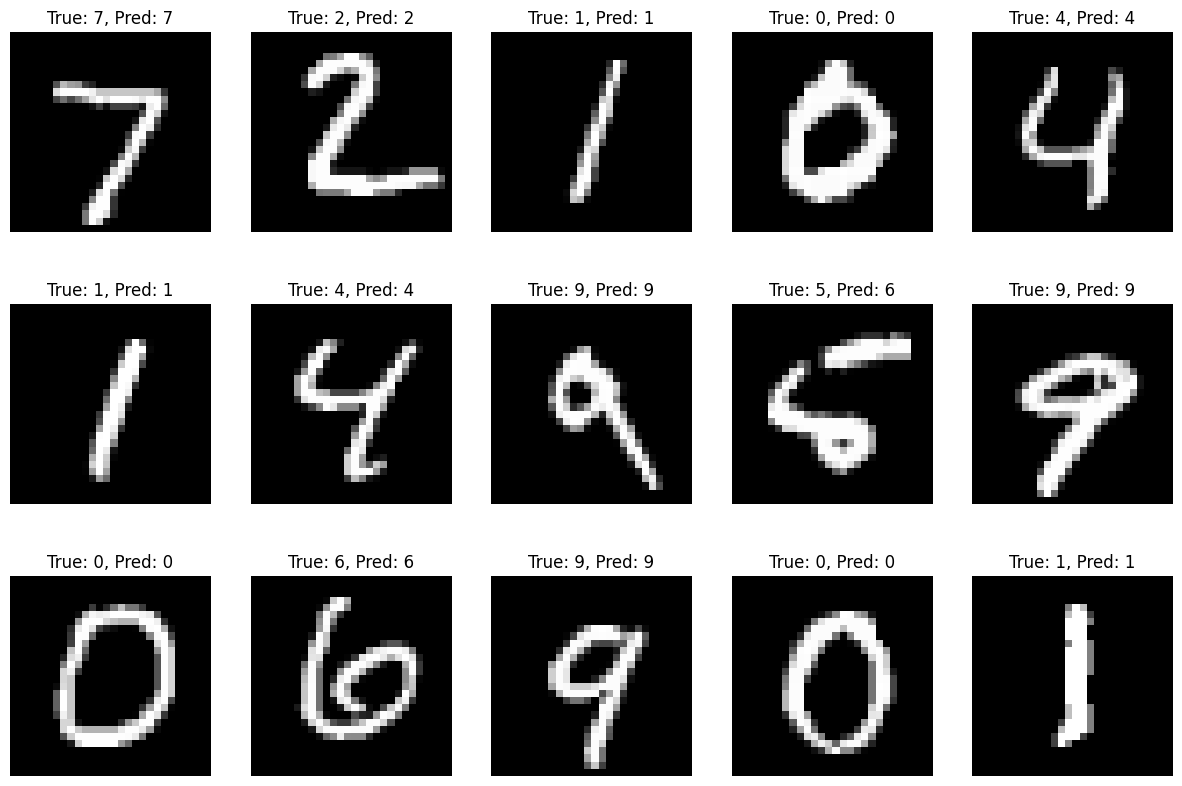

In [38]:
# Make predictions
y_pred = model.predict(X_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Display some sample predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
    ax.axis('off')
plt.show()